In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

from IPython.core.pylabtools import figsize

import statsmodels.api as sm
from patsy import dmatrix
from sklearn.model_selection import KFold
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [38]:
df = pd.read_csv('~/src/properties_2016.csv')
df.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
train_2016_df = pd.read_csv('~/src/train_2016.csv')
train_2016_df.tail()

,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [41]:
rel = ['parcelid', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'threequarterbathnbr', \
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet6', \
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', \
       'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', \
       'latitude', 'longitude', 'lotsizesquarefeet', 'numberofstories', \
       'poolcnt', 'poolsizesum', 'roomcnt', \
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'taxvaluedollarcnt', \
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']
rel, len(rel)

(['parcelid',
  'basementsqft',
  'bathroomcnt',
  'bedroomcnt',
  'calculatedbathnbr',
  'threequarterbathnbr',
  'finishedfloor1squarefeet',
  'calculatedfinishedsquarefeet',
  'finishedsquarefeet6',
  'finishedsquarefeet12',
  'finishedsquarefeet13',
  'finishedsquarefeet15',
  'finishedsquarefeet50',
  'fireplacecnt',
  'fullbathcnt',
  'garagecarcnt',
  'garagetotalsqft',
  'latitude',
  'longitude',
  'lotsizesquarefeet',
  'numberofstories',
  'poolcnt',
  'poolsizesum',
  'roomcnt',
  'unitcnt',
  'yardbuildingsqft17',
  'yardbuildingsqft26',
  'taxvaluedollarcnt',
  'structuretaxvaluedollarcnt',
  'landtaxvaluedollarcnt',
  'taxamount'],
 31)

In [42]:
rel_df = df[rel]
rel_df.tail()

,parcelid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,threequarterbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,...,poolcnt,poolsizesum,roomcnt,unitcnt,yardbuildingsqft17,yardbuildingsqft26,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
result_df1 = pd.merge(rel_df, train_2016_df)
result_df1.tail()

,parcelid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,threequarterbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,...,roomcnt,unitcnt,yardbuildingsqft17,yardbuildingsqft26,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
90270,11876798,NaN,3.0,4.0,3.0,NaN,NaN,2068.0,NaN,2068.0,...,0.0,1.0,NaN,NaN,596082.0,388582.0,207500.0,7335.81,0.0276,2016-04-15
90271,12808516,NaN,2.0,3.0,2.0,NaN,NaN,1352.0,NaN,1352.0,...,0.0,1.0,NaN,NaN,178408.0,86209.0,92199.0,2441.74,-0.1188,2016-06-07
90272,12010248,NaN,2.0,2.0,2.0,NaN,NaN,860.0,NaN,860.0,...,0.0,1.0,NaN,NaN,420000.0,129000.0,291000.0,5070.41,0.0843,2016-06-30
90273,14310905,NaN,2.5,3.0,2.5,1.0,NaN,2268.0,NaN,2268.0,...,0.0,NaN,NaN,NaN,1215816.0,389474.0,826342.0,12508.30,-0.0050,2016-03-31
90274,14636609,NaN,2.5,3.0,2.5,1.0,NaN,1812.0,NaN,1812.0,...,0.0,NaN,NaN,NaN,471286.0,237048.0,234238.0,5470.12,0.0129,2016-09-13


In [8]:
values = {
    'finishedsquarefeet6' : 1.,
    'finishedsquarefeet12' : 1.,
    'finishedsquarefeet13' : 1.,
    'finishedsquarefeet15' : 1.,
    'structuretaxvaluedollarcnt' : 1.,
    'landtaxvaluedollarcnt' : 1.,
    'calculatedbathnbr' : 1.,
    'calculatedfinishedsquarefeet' : 1827.16,
    'finishedfloor1squarefeet' : 1380.63,
    'poolcnt' : 1.0,
    'taxvaluedollarcnt' : 420478.99,
    'taxamount' : 5377.61,
    'basementsqft': 646.88,
    'bathroomcnt': 2.21,
    'bedroomcnt': 3.09,
    'threequarterbathnbr' : 1.0,
    'finishedsquarefeet50' : 1388.94,
    'fireplacecnt' : 1.17,
    'fullbathcnt' : 2.0,
    'garagecarcnt' : 2.0,
    'garagetotalsqft' : 383.77,
    'lotsizesquarefeet' : 22822.81,
    'numberofstories' : 1.0,
    'poolsizesum' : 519.71,
    'roomcnt' : 1.0,
    'unitcnt' : 1.0,
    'yardbuildingsqft17' : 319.80,
    'yardbuildingsqft26' : 278.30,
}

values

{'finishedsquarefeet6': 1.0,
 'finishedsquarefeet12': 1.0,
 'finishedsquarefeet13': 1.0,
 'finishedsquarefeet15': 1.0,
 'structuretaxvaluedollarcnt': 1.0,
 'landtaxvaluedollarcnt': 1.0,
 'calculatedbathnbr': 1.0,
 'calculatedfinishedsquarefeet': 1827.16,
 'finishedfloor1squarefeet': 1380.63,
 'poolcnt': 1.0,
 'taxvaluedollarcnt': 420478.99,
 'taxamount': 5377.61,
 'basementsqft': 646.88,
 'bathroomcnt': 2.21,
 'bedroomcnt': 3.09,
 'threequarterbathnbr': 1.0,
 'finishedsquarefeet50': 1388.94,
 'fireplacecnt': 1.17,
 'fullbathcnt': 2.0,
 'garagecarcnt': 2.0,
 'garagetotalsqft': 383.77,
 'lotsizesquarefeet': 22822.81,
 'numberofstories': 1.0,
 'poolsizesum': 519.71,
 'roomcnt': 1.0,
 'unitcnt': 1.0,
 'yardbuildingsqft17': 319.8,
 'yardbuildingsqft26': 278.3}

In [9]:
result_df1.fillna(values, inplace=True)
result_df1.tail()

,parcelid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,threequarterbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,...,roomcnt,unitcnt,yardbuildingsqft17,yardbuildingsqft26,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
90270,11876798,646.88,3.0,4.0,3.0,1.0,1380.63,2068.0,1.0,2068.0,...,0.0,1.0,319.8,278.3,596082.0,388582.0,207500.0,7335.81,0.0276,2016-04-15
90271,12808516,646.88,2.0,3.0,2.0,1.0,1380.63,1352.0,1.0,1352.0,...,0.0,1.0,319.8,278.3,178408.0,86209.0,92199.0,2441.74,-0.1188,2016-06-07
90272,12010248,646.88,2.0,2.0,2.0,1.0,1380.63,860.0,1.0,860.0,...,0.0,1.0,319.8,278.3,420000.0,129000.0,291000.0,5070.41,0.0843,2016-06-30
90273,14310905,646.88,2.5,3.0,2.5,1.0,1380.63,2268.0,1.0,2268.0,...,0.0,1.0,319.8,278.3,1215816.0,389474.0,826342.0,12508.30,-0.0050,2016-03-31
90274,14636609,646.88,2.5,3.0,2.5,1.0,1380.63,1812.0,1.0,1812.0,...,0.0,1.0,319.8,278.3,471286.0,237048.0,234238.0,5470.12,0.0129,2016-09-13


In [44]:
feature_dropped = ['logerror', 'transactiondate']
feature_dropped
result_df1.drop(feature_dropped, axis=1, inplace=True)

In [45]:
result_df1.tail()

,parcelid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,threequarterbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,...,poolcnt,poolsizesum,roomcnt,unitcnt,yardbuildingsqft17,yardbuildingsqft26,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
90270,11876798,NaN,3.0,4.0,3.0,NaN,NaN,2068.0,NaN,2068.0,...,NaN,NaN,0.0,1.0,NaN,NaN,596082.0,388582.0,207500.0,7335.81
90271,12808516,NaN,2.0,3.0,2.0,NaN,NaN,1352.0,NaN,1352.0,...,NaN,NaN,0.0,1.0,NaN,NaN,178408.0,86209.0,92199.0,2441.74
90272,12010248,NaN,2.0,2.0,2.0,NaN,NaN,860.0,NaN,860.0,...,NaN,NaN,0.0,1.0,NaN,NaN,420000.0,129000.0,291000.0,5070.41
90273,14310905,NaN,2.5,3.0,2.5,1.0,NaN,2268.0,NaN,2268.0,...,NaN,NaN,0.0,NaN,NaN,NaN,1215816.0,389474.0,826342.0,12508.30
90274,14636609,NaN,2.5,3.0,2.5,1.0,NaN,1812.0,NaN,1812.0,...,NaN,NaN,0.0,NaN,NaN,NaN,471286.0,237048.0,234238.0,5470.12


In [46]:
cat = ['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid', 'buildingqualitytypeid', \
       'buildingclasstypeid', 'decktypeid', 'fips', 'hashottuborspa', 'heatingorsystemtypeid', \
       'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc', \
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7', \
       'rawcensustractandblock', 'censustractandblock', 'regionidcounty', 'regionidcity', \
       'regionidzip', 'regionidneighborhood', 'typeconstructiontypeid', 'yearbuilt', \
       'assessmentyear', 'taxdelinquencyyear', 'fireplaceflag', 'storytypeid', 'taxdelinquencyflag']
cat

['parcelid',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'buildingqualitytypeid',
 'buildingclasstypeid',
 'decktypeid',
 'fips',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'rawcensustractandblock',
 'censustractandblock',
 'regionidcounty',
 'regionidcity',
 'regionidzip',
 'regionidneighborhood',
 'typeconstructiontypeid',
 'yearbuilt',
 'assessmentyear',
 'taxdelinquencyyear',
 'fireplaceflag',
 'storytypeid',
 'taxdelinquencyflag']

In [47]:
cat_df = df[cat]
cat_df.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,buildingqualitytypeid,buildingclasstypeid,decktypeid,fips,hashottuborspa,heatingorsystemtypeid,propertycountylandusecode,...,regionidcity,regionidzip,regionidneighborhood,typeconstructiontypeid,yearbuilt,assessmentyear,taxdelinquencyyear,fireplaceflag,storytypeid,taxdelinquencyflag
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
result_df2 = pd.merge(cat_df, train_2016_df)
result_df2.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,buildingqualitytypeid,buildingclasstypeid,decktypeid,fips,hashottuborspa,heatingorsystemtypeid,propertycountylandusecode,...,regionidneighborhood,typeconstructiontypeid,yearbuilt,assessmentyear,taxdelinquencyyear,fireplaceflag,storytypeid,taxdelinquencyflag,logerror,transactiondate
90270,11876798,1.0,NaN,4.0,NaN,NaN,6037.0,NaN,2.0,0100,...,114914.0,NaN,2008.0,2015.0,NaN,NaN,NaN,NaN,0.0276,2016-04-15
90271,12808516,NaN,NaN,7.0,NaN,NaN,6037.0,NaN,7.0,0100,...,NaN,NaN,1956.0,2015.0,NaN,NaN,NaN,NaN,-0.1188,2016-06-07
90272,12010248,1.0,NaN,4.0,NaN,NaN,6037.0,NaN,2.0,010C,...,32059.0,NaN,2011.0,2015.0,NaN,NaN,NaN,NaN,0.0843,2016-06-30
90273,14310905,NaN,NaN,NaN,NaN,NaN,6059.0,NaN,NaN,1,...,275824.0,NaN,2012.0,2015.0,NaN,NaN,NaN,NaN,-0.0050,2016-03-31
90274,14636609,NaN,NaN,NaN,NaN,NaN,6059.0,NaN,NaN,1,...,NaN,NaN,2013.0,2015.0,NaN,NaN,NaN,NaN,0.0129,2016-09-13


In [15]:
# fillna를 위한 values 만들기, fillna 적용하기(Nan >> nulls_)

values = {}
for i in cat:
    values[i] = "nulls_" + i[:10]
result_df2.fillna(values, inplace=True)
result_df2.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,buildingqualitytypeid,buildingclasstypeid,decktypeid,fips,hashottuborspa,heatingorsystemtypeid,propertycountylandusecode,...,regionidneighborhood,typeconstructiontypeid,yearbuilt,assessmentyear,taxdelinquencyyear,fireplaceflag,storytypeid,taxdelinquencyflag,logerror,transactiondate
90270,11876798,1,nulls_architectu,4,nulls_buildingcl,nulls_decktypeid,6037.0,nulls_hashottubo,2,0100,...,114914,nulls_typeconstr,2008,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,0.0276,2016-04-15
90271,12808516,nulls_airconditi,nulls_architectu,7,nulls_buildingcl,nulls_decktypeid,6037.0,nulls_hashottubo,7,0100,...,nulls_regionidne,nulls_typeconstr,1956,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,-0.1188,2016-06-07
90272,12010248,1,nulls_architectu,4,nulls_buildingcl,nulls_decktypeid,6037.0,nulls_hashottubo,2,010C,...,32059,nulls_typeconstr,2011,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,0.0843,2016-06-30
90273,14310905,nulls_airconditi,nulls_architectu,nulls_buildingqu,nulls_buildingcl,nulls_decktypeid,6059.0,nulls_hashottubo,nulls_heatingors,1,...,275824,nulls_typeconstr,2012,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,-0.0050,2016-03-31
90274,14636609,nulls_airconditi,nulls_architectu,nulls_buildingqu,nulls_buildingcl,nulls_decktypeid,6059.0,nulls_hashottubo,nulls_heatingors,1,...,nulls_regionidne,nulls_typeconstr,2013,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,0.0129,2016-09-13


In [16]:
result_df1.tail()

,parcelid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,threequarterbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,...,poolcnt,poolsizesum,roomcnt,unitcnt,yardbuildingsqft17,yardbuildingsqft26,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
90270,11876798,646.88,3.0,4.0,3.0,1.0,1380.63,2068.0,1.0,2068.0,...,1.0,519.71,0.0,1.0,319.8,278.3,596082.0,388582.0,207500.0,7335.81
90271,12808516,646.88,2.0,3.0,2.0,1.0,1380.63,1352.0,1.0,1352.0,...,1.0,519.71,0.0,1.0,319.8,278.3,178408.0,86209.0,92199.0,2441.74
90272,12010248,646.88,2.0,2.0,2.0,1.0,1380.63,860.0,1.0,860.0,...,1.0,519.71,0.0,1.0,319.8,278.3,420000.0,129000.0,291000.0,5070.41
90273,14310905,646.88,2.5,3.0,2.5,1.0,1380.63,2268.0,1.0,2268.0,...,1.0,519.71,0.0,1.0,319.8,278.3,1215816.0,389474.0,826342.0,12508.30
90274,14636609,646.88,2.5,3.0,2.5,1.0,1380.63,1812.0,1.0,1812.0,...,1.0,519.71,0.0,1.0,319.8,278.3,471286.0,237048.0,234238.0,5470.12


In [17]:
result_df2.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,buildingqualitytypeid,buildingclasstypeid,decktypeid,fips,hashottuborspa,heatingorsystemtypeid,propertycountylandusecode,...,regionidneighborhood,typeconstructiontypeid,yearbuilt,assessmentyear,taxdelinquencyyear,fireplaceflag,storytypeid,taxdelinquencyflag,logerror,transactiondate
90270,11876798,1,nulls_architectu,4,nulls_buildingcl,nulls_decktypeid,6037.0,nulls_hashottubo,2,0100,...,114914,nulls_typeconstr,2008,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,0.0276,2016-04-15
90271,12808516,nulls_airconditi,nulls_architectu,7,nulls_buildingcl,nulls_decktypeid,6037.0,nulls_hashottubo,7,0100,...,nulls_regionidne,nulls_typeconstr,1956,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,-0.1188,2016-06-07
90272,12010248,1,nulls_architectu,4,nulls_buildingcl,nulls_decktypeid,6037.0,nulls_hashottubo,2,010C,...,32059,nulls_typeconstr,2011,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,0.0843,2016-06-30
90273,14310905,nulls_airconditi,nulls_architectu,nulls_buildingqu,nulls_buildingcl,nulls_decktypeid,6059.0,nulls_hashottubo,nulls_heatingors,1,...,275824,nulls_typeconstr,2012,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,-0.0050,2016-03-31
90274,14636609,nulls_airconditi,nulls_architectu,nulls_buildingqu,nulls_buildingcl,nulls_decktypeid,6059.0,nulls_hashottubo,nulls_heatingors,1,...,nulls_regionidne,nulls_typeconstr,2013,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,0.0129,2016-09-13


In [18]:
result_df = pd.merge(result_df1, result_df2)
result_df.tail()

,parcelid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,threequarterbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,...,regionidneighborhood,typeconstructiontypeid,yearbuilt,assessmentyear,taxdelinquencyyear,fireplaceflag,storytypeid,taxdelinquencyflag,logerror,transactiondate
90522,11876798,646.88,3.0,4.0,3.0,1.0,1380.63,2068.0,1.0,2068.0,...,114914,nulls_typeconstr,2008,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,0.0276,2016-04-15
90523,12808516,646.88,2.0,3.0,2.0,1.0,1380.63,1352.0,1.0,1352.0,...,nulls_regionidne,nulls_typeconstr,1956,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,-0.1188,2016-06-07
90524,12010248,646.88,2.0,2.0,2.0,1.0,1380.63,860.0,1.0,860.0,...,32059,nulls_typeconstr,2011,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,0.0843,2016-06-30
90525,14310905,646.88,2.5,3.0,2.5,1.0,1380.63,2268.0,1.0,2268.0,...,275824,nulls_typeconstr,2012,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,-0.0050,2016-03-31
90526,14636609,646.88,2.5,3.0,2.5,1.0,1380.63,1812.0,1.0,1812.0,...,nulls_regionidne,nulls_typeconstr,2013,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,0.0129,2016-09-13


In [19]:
formula = 'logerror ~ scale(basementsqft) + scale(bathroomcnt) + scale(bedroomcnt) + scale(threequarterbathnbr) \
+ scale(finishedsquarefeet6) + scale(finishedsquarefeet12) + scale(finishedsquarefeet13) \
+ scale(finishedsquarefeet15) + scale(finishedsquarefeet50) + scale(fireplacecnt) + scale(fullbathcnt) \
+ scale(garagecarcnt) + scale(garagetotalsqft) + scale(lotsizesquarefeet) + scale(numberofstories) \
+ scale(poolsizesum) + scale(roomcnt) + scale(unitcnt) + scale(yardbuildingsqft17) + scale(yardbuildingsqft26) \
+ scale(structuretaxvaluedollarcnt) + scale(landtaxvaluedollarcnt) \
+ C(airconditioningtypeid) + C(architecturalstyletypeid) + C(buildingqualitytypeid) \
+ C(buildingclasstypeid) + C(decktypeid) + C(fips) + C(heatingorsystemtypeid) \
+ C(propertycountylandusecode) + C(propertylandusetypeid) + C(regionidcounty) \
+ C(regionidcity) + C(regionidzip) + C(regionidneighborhood) + C(typeconstructiontypeid) \
+ C(yearbuilt) + C(assessmentyear) + C(taxdelinquencyyear)'
formula

'logerror ~ scale(basementsqft) + bathroomcnt + bedroomcnt + threequarterbathnbr + scale(finishedsquarefeet6) + scale(finishedsquarefeet12) + scale(finishedsquarefeet13) + scale(finishedsquarefeet15) + scale(finishedsquarefeet50) + fireplacecnt + fullbathcnt + garagecarcnt + scale(garagetotalsqft) + scale(lotsizesquarefeet) + numberofstories + scale(poolsizesum) + roomcnt + unitcnt + scale(yardbuildingsqft17) + scale(yardbuildingsqft26) + scale(structuretaxvaluedollarcnt) + scale(landtaxvaluedollarcnt) + C(airconditioningtypeid) + C(architecturalstyletypeid) + C(buildingqualitytypeid) + C(buildingclasstypeid) + C(decktypeid) + C(fips) + C(heatingorsystemtypeid) + C(propertycountylandusecode) + C(propertylandusetypeid) + C(regionidcounty) + C(regionidcity) + C(regionidzip) + C(regionidneighborhood) + C(typeconstructiontypeid) + C(yearbuilt) + C(assessmentyear) + C(taxdelinquencyyear)'

In [20]:
model = sm.OLS.from_formula(formula, data=result_df)
result_w = model.fit()
print(result_w.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     2.607
Date:                Fri, 06 Jul 2018   Prob (F-statistic):          2.94e-184
Time:                        16:45:57   Log-Likelihood:                 38440.
No. Observations:               90527   AIC:                        -7.422e+04
Df Residuals:                   89199   BIC:                        -6.172e+04
Df Model:                        1327                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [21]:
result_df.tail()

,parcelid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,threequarterbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,...,regionidneighborhood,typeconstructiontypeid,yearbuilt,assessmentyear,taxdelinquencyyear,fireplaceflag,storytypeid,taxdelinquencyflag,logerror,transactiondate
90522,11876798,646.88,3.0,4.0,3.0,1.0,1380.63,2068.0,1.0,2068.0,...,114914,nulls_typeconstr,2008,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,0.0276,2016-04-15
90523,12808516,646.88,2.0,3.0,2.0,1.0,1380.63,1352.0,1.0,1352.0,...,nulls_regionidne,nulls_typeconstr,1956,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,-0.1188,2016-06-07
90524,12010248,646.88,2.0,2.0,2.0,1.0,1380.63,860.0,1.0,860.0,...,32059,nulls_typeconstr,2011,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,0.0843,2016-06-30
90525,14310905,646.88,2.5,3.0,2.5,1.0,1380.63,2268.0,1.0,2268.0,...,275824,nulls_typeconstr,2012,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,-0.0050,2016-03-31
90526,14636609,646.88,2.5,3.0,2.5,1.0,1380.63,1812.0,1.0,1812.0,...,nulls_regionidne,nulls_typeconstr,2013,2015.0,nulls_taxdelinqu,nulls_fireplacef,nulls_storytypei,nulls_taxdelinqu,0.0129,2016-09-13


In [49]:
rel = ['parcelid', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'threequarterbathnbr', \
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet6', \
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', \
       'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', \
       'latitude', 'longitude', 'lotsizesquarefeet', 'numberofstories', \
       'poolcnt', 'poolsizesum', 'roomcnt', \
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'taxvaluedollarcnt', \
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']
rel, len(rel)

(['parcelid',
  'basementsqft',
  'bathroomcnt',
  'bedroomcnt',
  'calculatedbathnbr',
  'threequarterbathnbr',
  'finishedfloor1squarefeet',
  'calculatedfinishedsquarefeet',
  'finishedsquarefeet6',
  'finishedsquarefeet12',
  'finishedsquarefeet13',
  'finishedsquarefeet15',
  'finishedsquarefeet50',
  'fireplacecnt',
  'fullbathcnt',
  'garagecarcnt',
  'garagetotalsqft',
  'latitude',
  'longitude',
  'lotsizesquarefeet',
  'numberofstories',
  'poolcnt',
  'poolsizesum',
  'roomcnt',
  'unitcnt',
  'yardbuildingsqft17',
  'yardbuildingsqft26',
  'taxvaluedollarcnt',
  'structuretaxvaluedollarcnt',
  'landtaxvaluedollarcnt',
  'taxamount'],
 31)

In [50]:
real_df = result_df[rel]
real_df.tail()

,parcelid,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,threequarterbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,...,poolcnt,poolsizesum,roomcnt,unitcnt,yardbuildingsqft17,yardbuildingsqft26,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
90522,11876798,646.88,3.0,4.0,3.0,1.0,1380.63,2068.0,1.0,2068.0,...,1.0,519.71,0.0,1.0,319.8,278.3,596082.0,388582.0,207500.0,7335.81
90523,12808516,646.88,2.0,3.0,2.0,1.0,1380.63,1352.0,1.0,1352.0,...,1.0,519.71,0.0,1.0,319.8,278.3,178408.0,86209.0,92199.0,2441.74
90524,12010248,646.88,2.0,2.0,2.0,1.0,1380.63,860.0,1.0,860.0,...,1.0,519.71,0.0,1.0,319.8,278.3,420000.0,129000.0,291000.0,5070.41
90525,14310905,646.88,2.5,3.0,2.5,1.0,1380.63,2268.0,1.0,2268.0,...,1.0,519.71,0.0,1.0,319.8,278.3,1215816.0,389474.0,826342.0,12508.30
90526,14636609,646.88,2.5,3.0,2.5,1.0,1380.63,1812.0,1.0,1812.0,...,1.0,519.71,0.0,1.0,319.8,278.3,471286.0,237048.0,234238.0,5470.12


In [54]:
result_df.isna().sum()

parcelid                        0
basementsqft                    0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
threequarterbathnbr             0
finishedfloor1squarefeet        0
calculatedfinishedsquarefeet    0
finishedsquarefeet6             0
finishedsquarefeet12            0
finishedsquarefeet13            0
finishedsquarefeet15            0
finishedsquarefeet50            0
fireplacecnt                    0
fullbathcnt                     0
garagecarcnt                    0
garagetotalsqft                 0
latitude                        0
longitude                       0
lotsizesquarefeet               0
numberofstories                 0
poolcnt                         0
poolsizesum                     0
roomcnt                         0
unitcnt                         0
yardbuildingsqft17              0
yardbuildingsqft26              0
taxvaluedollarcnt               0
structuretaxvaluedollarcnt      0
landtaxvaluedo

In [51]:
columns = real_df.columns
columns

Index(['parcelid', 'basementsqft', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'threequarterbathnbr', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet6',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt',
       'garagetotalsqft', 'latitude', 'longitude', 'lotsizesquarefeet',
       'numberofstories', 'poolcnt', 'poolsizesum', 'roomcnt', 'unitcnt',
       'yardbuildingsqft17', 'yardbuildingsqft26', 'taxvaluedollarcnt',
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'],
      dtype='object')

In [52]:
y = result_df.iloc[:, -2:-1]
len(y)

90527

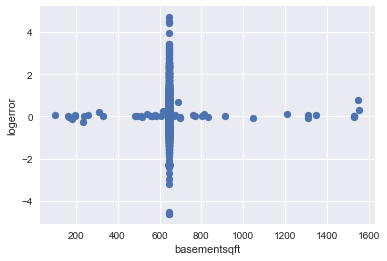

In [53]:
x = real_df[columns[1]]

plt.scatter(x, y)
plt.xlabel(columns[1])
plt.ylabel('logerror')
plt.show()

In [ ]:
# vif factor 결과 반영

In [ ]:
formula = 'logerror ~ scale(bathroomcnt) + scale(bedroomcnt) \
+ scale(threequarterbathnbr) \
+ scale(finishedsquarefeet6) + scale(finishedsquarefeet12) \
+ scale(finishedsquarefeet13) + scale(finishedsquarefeet15) + scale(finishedsquarefeet50) \
+ scale(fireplacecnt) + scale(fullbathcnt) + scale(garagecarcnt) + scale(garagetotalsqft) \
+ scale(lotsizesquarefeet) + scale(numberofstories) \
+ scale(roomcnt) + scale(unitcnt) \
+ scale(yardbuildingsqft17) + scale(structuretaxvaluedollarcnt) \
+ scale(landtaxvaluedollarcnt) + scale(taxamount) + C(airconditioningtypeid) \
+ C(architecturalstyletypeid) + C(buildingqualitytypeid) \
+ C(buildingclasstypeid) + C(decktypeid) + C(fips) + C(heatingorsystemtypeid) \
+ C(propertycountylandusecode) + C(propertylandusetypeid) + C(regionidcounty) \
+ C(regionidcity) + C(regionidzip) + C(regionidneighborhood) + C(typeconstructiontypeid) \
+ C(yearbuilt) + C(assessmentyear) + C(taxdelinquencyyear)'
formula

In [ ]:
# R^2
# 1. 
# 2. 0.039

model = sm.OLS.from_formula(formula, data=result_df)
result_w = model.fit()
print(result_w.summary())

In [ ]:
result_df.iloc[:, -2:-1].tail()

In [ ]:
# 잔차의 정규성 검정 (QQ plot)

sp.stats.probplot(result_w.resid, plot=plt)
plt.show()

test = sms.omni_normtest(result_w.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

In [ ]:
# 정규성 검정

test = sms.omni_normtest(result_w.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

In [ ]:
# 교차 검증

X = result_df.iloc[:, :-2].tail()
y = result_df.iloc[:, -2:-1].tail()

cv = KFold(10)
scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(X)):
    X_train = X.values[train_index]
    y_train = y.values[train_index]
    X_test = X.values[test_index]
    y_test = y.values[test_index]
    
    model = sm.OLS(y, X)
    result = model.fit()
    y_pred = result.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

In [ ]:
result_df.dtypes